# 1. Time series manipulation

## 1.1. Datetime manipulation

In [1]:
import numpy as np
import pandas as pd

### Standard format
The complete datetime has the data type of <code style='font-size:13px;'>datetime64</code> and the format can be either <code style='font-size:13px;'>YYYY-MM-DD</code> or <code style='font-size:13px;'>YYYY-MM-DD hh:mm:ss</code>. This column can be used to detach year, quarter, month,... and the cyclic fields.

To quickly create a date or time column, use the <code style='font-size:13px;'>pd.date_range()</code> function with the <code style='font-size:13px;'>freq</code> parameter indicating the frequency of the date. The <code style='font-size:13px;'>freq</code> parameter support a number of [aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

In [8]:
seqMS = pd.date_range('2020-01-01', '2020-12-31', freq='MS')[:5]
seq3h = pd.date_range('2020-01-01', '2020-12-31', freq='3h')[:5]
pd.DataFrame({
    'month_start': seqMS,
    'time_3h': seq3h,
})

,month_start,time_3h
0,2020-01-01,2020-01-01 00:00:00
1,2020-02-01,2020-01-01 03:00:00
2,2020-03-01,2020-01-01 06:00:00
3,2020-04-01,2020-01-01 09:00:00
4,2020-05-01,2020-01-01 12:00:00


### Useful techniques

In [4]:
dfDate = pd.DataFrame({
    'day': [1, 2, 3],
    'month': [1, 1, 1],
    'year': [2020, 2020, 2020]
})

# combine three columns "day", "month" and "year"
dfDate.assign(date=pd.to_datetime(dfDate[['day', 'month', 'year']]))

,day,month,year,date
0,1,1,2020,2020-01-01
1,2,1,2020,2020-01-02
2,3,1,2020,2020-01-03


In [5]:
sequence = pd.date_range('2020-01-01', '2020-12-31', freq='17h 36t 43s')
dfDate = pd.DataFrame({'time': sequence}).head()
dfDate.assign(date=dfDate.time.dt.date)

,time,date
0,2020-01-01 00:00:00,2020-01-01
1,2020-01-01 17:36:43,2020-01-01
2,2020-01-02 11:13:26,2020-01-02
3,2020-01-03 04:50:09,2020-01-03
4,2020-01-03 22:26:52,2020-01-03


### Formatting date

In [6]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='25D')})
dfDate.assign(date_print=dfDate.date.dt.strftime('%d/%m/%y')).head()

,date,date_print
0,2020-01-01,01/01/20
1,2020-01-26,26/01/20
2,2020-02-20,20/02/20
3,2020-03-16,16/03/20
4,2020-04-10,10/04/20


### Extracting date part

In [7]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})

dfDate\
    .assign(year=dfDate.date.dt.to_period('Y').astype(str))\
    .assign(quarter=dfDate.date.dt.to_period('Q').astype(str).str.replace('Q', '-'))\
    .assign(month=dfDate.date.dt.to_period('M').astype(str))\
    .assign(week=dfDate.date.dt.strftime('%Y-%U'))

,date,year,quarter,month,week
0,2020-01-01 00:00:00,2020,2020-1,2020-01,2020-00
1,2020-03-10 10:40:00,2020,2020-1,2020-03,2020-10
2,2020-05-18 21:20:00,2020,2020-2,2020-05,2020-20
3,2020-07-27 08:00:00,2020,2020-3,2020-07,2020-30
4,2020-10-04 18:40:00,2020,2020-4,2020-10,2020-40
5,2020-12-13 05:20:00,2020,2020-4,2020-12,2020-50


### Extracting cyclic attributes

In [8]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})

dfDate\
    .assign(weekday=dfDate.date.dt.day_name())\
    .assign(day_of_year=dfDate.date.dt.dayofyear)\
    .assign(month_of_year=dfDate.date.dt.month)\
    .assign(quarter_of_year=dfDate.date.dt.quarter)

,date,weekday,day_of_year,month_of_year,quarter_of_year
0,2020-01-01 00:00:00,Wednesday,1,1,1
1,2020-03-10 10:40:00,Tuesday,70,3,1
2,2020-05-18 21:20:00,Monday,139,5,2
3,2020-07-27 08:00:00,Monday,209,7,3
4,2020-10-04 18:40:00,Sunday,278,10,4
5,2020-12-13 05:20:00,Sunday,348,12,4


### Rounding date
The <code style='font-size:13px;'>freq</code> parameter of the <code style='font-size:13px;'>Series.dt.round()</code> method uses the same aliases mentioned earlier.

In [9]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
dfDate.assign(date_trunc=dfDate.date.dt.round(freq='h'))

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01 00:00:00
1,2020-03-10 10:40:00,2020-03-10 11:00:00
2,2020-05-18 21:20:00,2020-05-18 21:00:00
3,2020-07-27 08:00:00,2020-07-27 08:00:00
4,2020-10-04 18:40:00,2020-10-04 19:00:00
5,2020-12-13 05:20:00,2020-12-13 05:00:00


However, the <code style='font-size:13px;'>Series.dt.round()</code> method only works with fixed frequencies such as hour, minute, second. For rounding to date or month, use the <code style='font-size:13px;'>Series.dt.to_period()</code> method.

In [11]:
dfDate = pd.DataFrame({'date': pd.date_range('2020-01-01', '2020-12-31', freq='100000 min')})
dfDate.assign(date_trunc=dfDate.date.dt.to_period('M').dt.to_timestamp())

,date,date_trunc
0,2020-01-01 00:00:00,2020-01-01
1,2020-03-10 10:40:00,2020-03-01
2,2020-05-18 21:20:00,2020-05-01
3,2020-07-27 08:00:00,2020-07-01
4,2020-10-04 18:40:00,2020-10-01
5,2020-12-13 05:20:00,2020-12-01


### Timedelta

In [9]:
dfDelta = pd.DataFrame({
    'date1': pd.date_range('2020-01-01', '2020-01-31', freq='3D'),
    'date2': pd.date_range('2020-01-02', '2020-03-15', freq='W')
})
dfDelta['timedelta'] = dfDelta.date2 - dfDelta.date1
dfDelta['date3'] = dfDelta.date1 + pd.Timedelta('15 days')
dfDelta

,date1,date2,timedelta,date3
0,2020-01-01,2020-01-05,4 days,2020-01-16
1,2020-01-04,2020-01-12,8 days,2020-01-19
2,2020-01-07,2020-01-19,12 days,2020-01-22
3,2020-01-10,2020-01-26,16 days,2020-01-25
4,2020-01-13,2020-02-02,20 days,2020-01-28
5,2020-01-16,2020-02-09,24 days,2020-01-31
6,2020-01-19,2020-02-16,28 days,2020-02-03
7,2020-01-22,2020-02-23,32 days,2020-02-06
8,2020-01-25,2020-03-01,36 days,2020-02-09
9,2020-01-28,2020-03-08,40 days,2020-02-12


## 1.2. Time series filling
A time series may have no existing blank value, however, it doesn't mean that date column is completed. A completed time series requires all data points to be equally spaced. In other words, the date or time frequency should be a constant across the dataset. Interpolation (the process of inferring new values from given ones) is a great technique filling missing time series.

In [1]:
import numpy as np
import pandas as pd

In [3]:
dfPrice = pd.DataFrame({
    'date': pd.to_datetime([
        '2020-01-01', '2020-01-03', '2020-01-04', '2020-01-05',
        '2020-01-06', '2020-01-07', '2020-01-09', '2020-01-10'
    ]),
    'price': [110, 113, 112, 115, 118, 120, 118, 116]
})

### Unhiding missing data

In [4]:
dfPrice = dfPrice.set_index('date').asfreq('d').reset_index()
dfPrice

,date,price
0,2020-01-01,110.0
1,2020-01-02,NaN
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,NaN
8,2020-01-09,118.0
9,2020-01-10,116.0


### Neighbor filling
Two approaches:
- Foward filling: $y_t\leftarrow y_{t-1}$
- Backward filling: $y_t\leftarrow y_{t+1}$

In [5]:
forward = dfPrice.price.fillna(method='ffill')
backward = dfPrice.price.fillna(method='bfill')
dfPrice.assign(forward=forward, backward=backward)

,date,price,forward,backward
0,2020-01-01,110.0,110.0,110.0
1,2020-01-02,NaN,110.0,113.0
2,2020-01-03,113.0,113.0,113.0
3,2020-01-04,112.0,112.0,112.0
4,2020-01-05,115.0,115.0,115.0
5,2020-01-06,118.0,118.0,118.0
6,2020-01-07,120.0,120.0,120.0
7,2020-01-08,NaN,120.0,118.0
8,2020-01-09,118.0,118.0,118.0
9,2020-01-10,116.0,116.0,116.0


### Linear interpolating
This is a family of interpolation, where the simplest strategy is:

$$y_t\leftarrow \frac{y_{t-1}+y_{t+1}}{2}$$

In [20]:
filled_values = dfPrice.price.interpolate(method='linear')
dfPrice.assign(price=filled_values)

,date,price
0,2020-01-01,110.0
1,2020-01-02,111.5
2,2020-01-03,113.0
3,2020-01-04,112.0
4,2020-01-05,115.0
5,2020-01-06,118.0
6,2020-01-07,120.0
7,2020-01-08,119.0
8,2020-01-09,118.0
9,2020-01-10,116.0


## 1.3. Time series calculation

In [21]:
import pandas as pd
import numpy as np

### Cumulative sum
[Cumulative sum](https://en.wikipedia.org/wiki/Running_total) is the discrete version of [antiderivative](https://en.wikipedia.org/wiki/Antiderivative), the transformed series $\mathbf{y}'$ satisfies:

$$y'_t=y_1+y_2+\dots+y_t$$

In [22]:
dfPurchase = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', periods=12),
    'quantity': [10, 13, 11, 12, 8, 9, 9, 11, 10, 11, 13, 14]
})

dfPurchase['quantity_cumulative'] = dfPurchase.quantity.cumsum()
dfPurchase

,date,quantity,quantity_cumulative
0,2000-01-01,10,10
1,2000-01-02,13,23
2,2000-01-03,11,34
3,2000-01-04,12,46
4,2000-01-05,8,54
5,2000-01-06,9,63
6,2000-01-07,9,72
7,2000-01-08,11,83
8,2000-01-09,10,93
9,2000-01-10,11,104


### Differencing
[Differencing](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average#Differencing) is the discrete version of [derivative](https://en.wikipedia.org/wiki/Derivative), in which the transformed series $\mathbf{y}'$ is given by:

$$y_t'=y_t-y_{t-1}$$

In [6]:
import numpy as np
import pandas as pd

In [7]:
dfPurchase = pd.DataFrame({
    'date': pd.date_range(start='1/1/2000', periods=12),
    'quantity': [10, 13, 11, 12, 8, 9, 9, 11, 10, 11, 13, 14]
})

dfPurchase['quantity_difference'] = dfPurchase.quantity.diff(periods=2)
dfPurchase.head(10)

,date,quantity,quantity_difference
0,2000-01-01,10,NaN
1,2000-01-02,13,NaN
2,2000-01-03,11,1.0
3,2000-01-04,12,-1.0
4,2000-01-05,8,-3.0
5,2000-01-06,9,-3.0
6,2000-01-07,9,1.0
7,2000-01-08,11,2.0
8,2000-01-09,10,1.0
9,2000-01-10,11,0.0


### Moving average
Given a series (which has $N$ observations), [moving average](https://en.wikipedia.org/wiki/Moving_average) or rolling mean calculate the average of each pre-selected size window. A window of size $K$ (which implies the order of moving average) means $K$ consecutive values is taken into calculating the mean. Rolling mean is used on time series data to smooth the short-term fluctuations and highlight long-term trends and cycles. Some examples of commonly used values of $K$:
- For a date series, $K=7$ (weekly) or $K=30$ (monthly).
- For a month series, $K=4$ (quarterly) or $K=12$ (annual).

In [1]:
import numpy as np
import pandas as pd

In [3]:
dfRate = pd.read_csv('data/exchange_rate.csv')

dfRate['rate_smooth'] = dfRate.rate.rolling(window=7, center=True).mean()
dfRate.head(10)

,date,rate,rate_smooth
0,2020-02-28,23241.0,NaN
1,2020-02-27,23241.5,NaN
2,2020-02-26,23241.0,NaN
3,2020-02-25,23271.0,23246.285714
4,2020-02-24,23248.5,23244.428571
5,2020-02-23,23243.5,23244.714286
6,2020-02-22,23237.5,23243.071429
7,2020-02-21,23228.0,23239.500000
8,2020-02-20,23243.5,23238.285714
9,2020-02-19,23229.5,23239.928571


Notice that there will be $N-K+1$ rolling mean points and $K-1$ null values. Therefore, if $K$ is even, then the rolling mean cannot be centered. To avoid this problem, calculate the rolling mean once again with the order of 2.

In [49]:
dfRate = pd.read_csv('data/exchange_rate.csv')

rate = dfRate.rate
ma6 = rate.rolling(window=6, center=True).mean()
ma6x2 = ma6.rolling(window=2).mean().shift(-1)

dfRate['rate_smooth'] = ma6x2
dfRate.head(10)

,date,rate,rate_smooth
0,2020-02-28,23241.0,NaN
1,2020-02-27,23241.5,NaN
2,2020-02-26,23241.0,NaN
3,2020-02-25,23271.0,23247.458333
4,2020-02-24,23248.5,23246.041667
5,2020-02-23,23243.5,23245.125000
6,2020-02-22,23237.5,23241.875000
7,2020-02-21,23228.0,23238.208333
8,2020-02-20,23243.5,23237.708333
9,2020-02-19,23229.5,23238.875000


### Growth rate
The formula for growth rate is given by:

$$r_t=\frac{y_t-y_{t-1}}{y_{t-1}}$$

In [28]:
import numpy as np
import pandas as pd

In [29]:
dfCpi = pd.DataFrame({
    'quarter': [f'{year} Q{quarter}' for year in range(2017,2020) for quarter in range(1,5)],
    'cost': [111.63, 112.23, 112.68, 113.10, 114.10, 115.28, 115.66, 115.59, 115.98, 117.37, 117.69, 117.94]
})

dfCpi['growth_over_last_period'] = dfCpi.cost.pct_change().map('{:.2%}'.format)
dfCpi['growth_over_same_period_last_year'] = dfCpi.cost.pct_change(periods=4).map('{:.2%}'.format)
dfCpi

,quarter,cost,growth_over_last_period,growth_over_same_period_last_year
0,2017 Q1,111.63,nan%,nan%
1,2017 Q2,112.23,0.54%,nan%
2,2017 Q3,112.68,0.40%,nan%
3,2017 Q4,113.10,0.37%,nan%
4,2018 Q1,114.10,0.88%,2.21%
5,2018 Q2,115.28,1.03%,2.72%
6,2018 Q3,115.66,0.33%,2.64%
7,2018 Q4,115.59,-0.06%,2.20%
8,2019 Q1,115.98,0.34%,1.65%
9,2019 Q2,117.37,1.20%,1.81%


# 2. Time series analysis
In this section, we discuss possible characteristics that can be observed from a [time series](https://en.wikipedia.org/wiki/Time_series):
- *Trend*, the long-term change of data (increasing or decreasing) without looking at small fluctuations.
- *Seasonality*, the pattern that repeats after a specific period.
- *Cyclic*, very much like seasonality but the length of each cycle is not fixed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pmdarima as pm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, SVAR, VARMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
from prophet import Prophet

plt.style.use(['seaborn', 'seaborn-whitegrid'])
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## 2.1. Notation

### Time series notation
It's important to introduce time series notations:
- $\mathbf{y}=(y_1,y_2,\dots,y_t,\dots,y_T)$ represents the entire series
- $y_t$ (for $t=1,2,\dots,T$) represents an observation, $t$ represents any observed time step
- $\hat{y}_{T+h}$ (for $h=1,2,\dots,\infty$) is an unknown future value which is going to be forecasted, $h$ is the forecasting horizon
- $\hat{y}_{T+h|T}$ is the forecast value $\hat{y}_{T+h}$ taking into account all observations up to time $T$

### Backshift notation
Now we have walked through all important time series transformations: shifting, differencing and summing, let's introduce the *backshift* notation $B$, an operator that shifts our series 1 step backward. We define $B(\mathbf{y})=(\emptyset,y_1,y_2,\dots,y_{t-1},\dots,y_{T-1})$. We are going to use $B$ to describe different transformations of a simple series $\mathbf{y}=(10,12,15,16,20)$.

*Shifting*
- By definition, $B(\mathbf{y})=(\emptyset,10,12,15,16)$
- $B^2(\mathbf{y})=B(B(\mathbf{y}))=(\emptyset,\emptyset,10,12,15)$ represents the 2-step lagged series
- $B^k(\mathbf{y})$ represents a $k$-step lagged series

*Differencing*
- $(1-B)(\mathbf{y})=\mathbf{y}-B(\mathbf{y})=(\emptyset,2,3,1,4)$ represents the 1-order differenced series
- $(1-B)^2(\mathbf{y})=(\mathbf{y}-B(\mathbf{y}))-B(\mathbf{y}-B(\mathbf{y}))=(\emptyset,\emptyset,1,-2,3)$ represents the 2-order differenced series
- $(1-B)^k(\mathbf{y})$ represents a $k$-order differenced series

*Running total*
- Denotes $\mathbf{z}=(10,22,37,53,73)$ the cumulative sum of $\mathbf{y}$, then $(1-B)(\mathbf{z})=(\emptyset,12,15,16,20)=\mathbf{y}$
- Rewriting the above equation gives us $(1-B)^{-1}(\mathbf{y})$ the representation of cumulative sum, can also be thought as the inverse of differencing

## 2.2. Auto correlation
When identifying possible relationship between historical data and the current moment, there are two useful functions, each is plotted in a lollipop chart:
- ACF (**A**uto-**C**orrelation **F**unction). It plots the Pearson's correlation coefficients $\rho_1,\rho_2,\dots$ of a series $\mathbf{y}$ against each of its lagged versions. That is to say, $\rho_1$ measures how $B(\mathbf{y})$ affects $\mathbf{y}$. For $\rho_2$, it actually measures the total effect of both $B^2(\mathbf{y})$ and $B(\mathbf{y})$ on $\mathbf{y}$, since $B^2(\mathbf{y})$ and $B(\mathbf{y})$ are also correlated. This explains why the ACF chart is usually smooth.
- PACF (**P**artial **ACF**). It plots the coefficients $\beta_1,\beta_2,\dots$ of the OLS regression function
$\mathbf{y}=\beta_0+\beta_1B(\mathbf{y})+\beta_2B^2(\mathbf{y})+\dots$
PACF describes the direct effect $\beta_k$ made by previous data $B^k(\mathbf{y})$, since the later effects has been captured by the corresponding coefficients $(\beta_1,\beta_2,\dots,\beta_{k-1})$. This overcomes the cumulative effect in ACF.

Both ACF and PACF include a $95\%$ confidence band indicating the correlation coefficient is not significant if it falls into that band.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.datasets import load_airline, load_macroeconomic
import warnings

plt.style.use(['seaborn', 'seaborn-whitegrid'])
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [4]:
def plot_time_series(series):
    mosaic = [
        ['ts',  'ts'  ],
        ['acf', 'pacf']
    ]
    fig, ax = plt.subplot_mosaic(mosaic, figsize=(10, 6), constrained_layout=True)
    series.plot(ax=ax['ts'], title='Original series')
    plot_acf(series, ax=ax['acf'])
    plot_pacf(series, ax=ax['pacf'])
    plt.show()

In the next part, we are plotting the time series plot along with ACF and PACF for some different series. They help us finding possible trends or seasonality in the data.

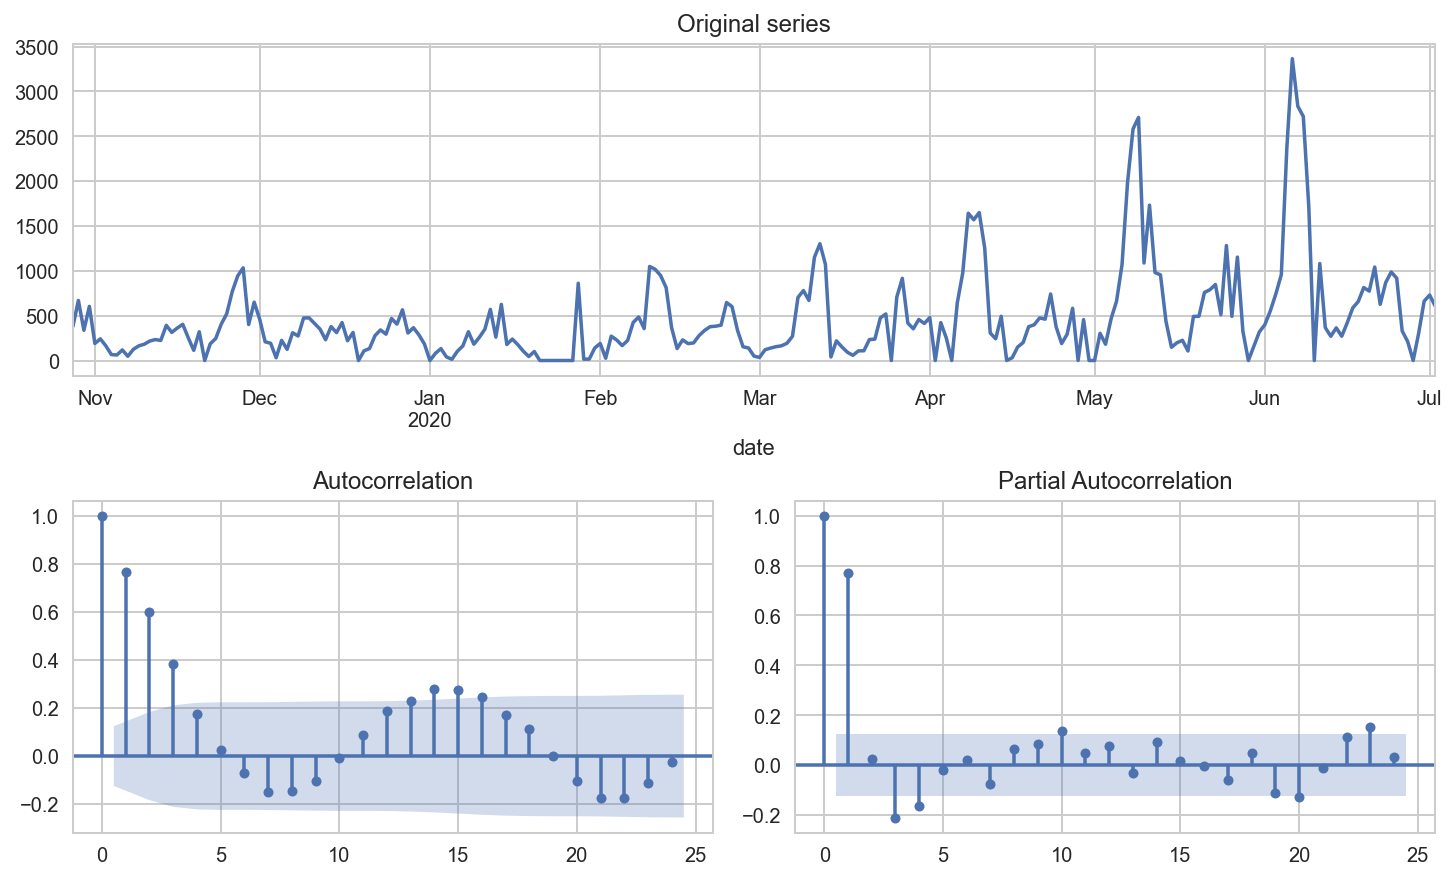

In [64]:
dfQty = pd.read_csv('data/purchase_quantity.csv', index_col='date')
dfQty.index = dfQty.index.astype('datetime64[ns]').to_period('D')
# dfQty = dfQty.asfreq('D')

plot_time_series(dfQty.quantity)

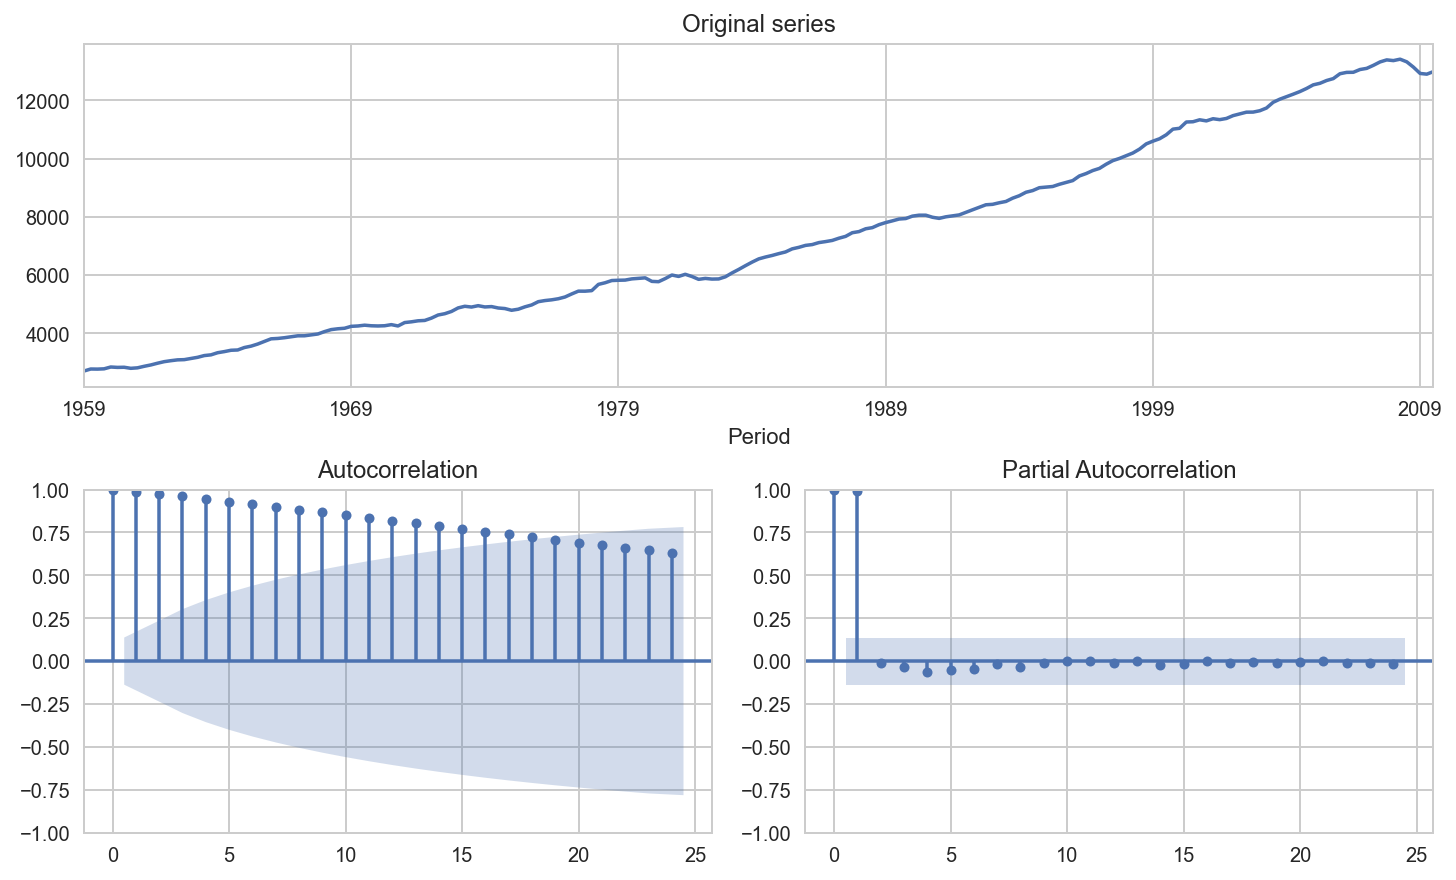

In [16]:
dfEco = load_macroeconomic()
plot_time_series(dfEco.realgdp)

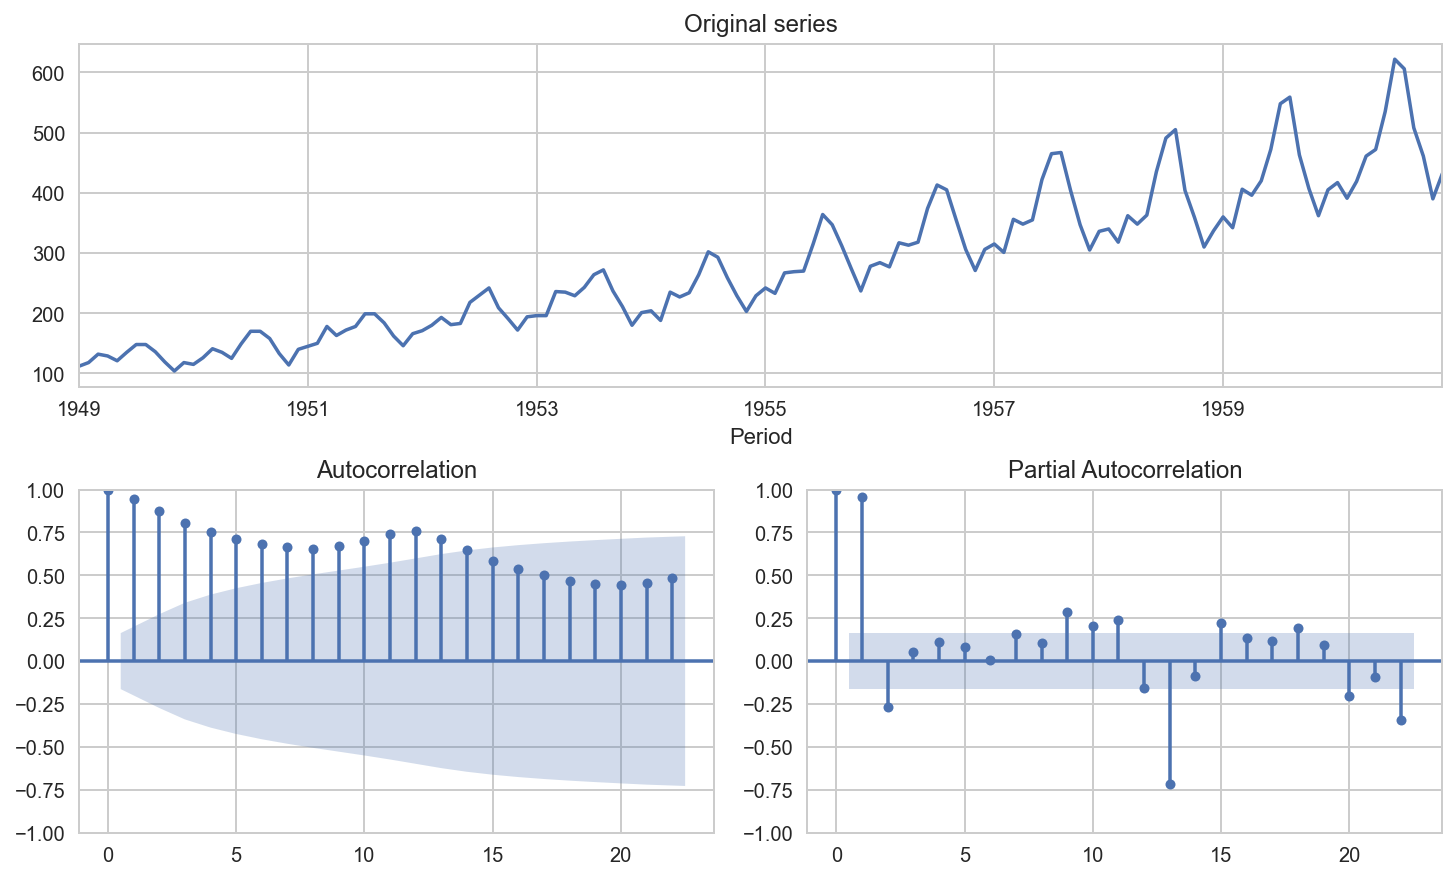

In [24]:
dfAirline = load_airline()
plot_time_series(dfAirline)

## 2.3. Seasonal decomposition
Time series decompostion is a statistical technique that factorizes data into three components: trend, residual and noise. There are two approaches to achieve this, using an additive model or a multiplicative model, where the original data equals to the sum or the product of its componennts.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [17]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
dfQuantity['quantity'] = dfQuantity.quantity.fillna(1e-6) + 1e-6
dfQuantity.head()

,date,quantity
0,2019-10-28,379.490001
1,2019-10-29,669.510001
2,2019-10-30,337.170001
3,2019-10-31,603.740001
4,2019-01-11,189.820001


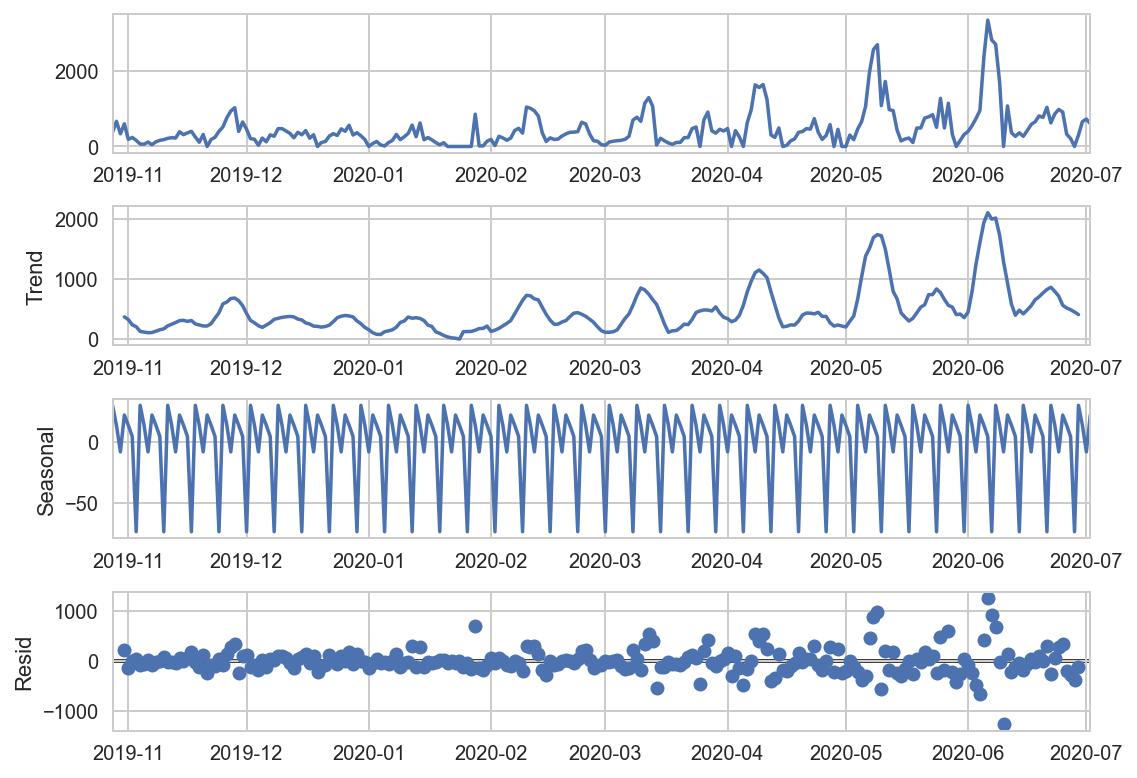

In [3]:
df = dfQuantity.copy()
df = df.set_index('date')
decomposer = seasonal_decompose(df, model='additive', period=7)
decomposer.plot()
plt.show()

In [7]:
decomposer.seasonal.head(7)

date
2019-10-28    29.471737
2019-10-29    13.227030
2019-10-30    -8.377718
2019-10-31    21.559084
2019-11-01    13.299370
2019-11-02     4.106962
2019-11-03   -73.286467
Name: seasonal, dtype: float64

## 2.4. Stationarity
Stationarity refers to a time series whose characteristics do not depends on which time period it is observed. If a time series violates one of these conditions, it is considered non-stationary:
- Constant mean at every timeframe
- Constant variance at every timeframe
- No seasonality

To check whether a time series is stationary, we can look at its line chart. Let's plot some examples:

<img src='image/stationary.png' style='height:500px; margin:20px auto 20px;'>

- Series (d), (h), (i) have seasonality
- Series (a), (c), (e), (f), (i) have trends, thus their means at different periods are not constants
- Series (i) has increasing variance over time
- Ruling out all violated series above leaves only (b) and (g) stationary

### Dickey-Fuller test
Instead of looking at charts, [Agumented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) test can be used to decide if a series is stationary. The hypotheses:
- $H_0$: data is non-stationary
- $H_1$: data is stationary

The decision making process is: if either p-value < significance level or test statistic < critical value, we reject $H_0$ and conclude that our data is stationary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [7]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
dfQuantity['quantity'] = dfQuantity.quantity.fillna(1e-6) + 1e-6
quantity = dfQuantity.set_index('date')

In [5]:
def StationaryTest(s):
    from statsmodels.tsa.stattools import adfuller
    stat, pval, _, _, crits, _ = adfuller(s, regression='nc')
    result = pval < 0.05
    
    conclusion = 'stationary' if result else 'non-stationary'
    sign = '<' if result else '>'
    
    mess = f'p-value={pval:6f} {sign} 0.05 | data is {conclusion}'
    print(mess)

In [ ]:
StationaryTest(quantity)

p-value=0.157594 > 0.05 | data is non-stationary


In [ ]:
StationaryTest(np.log(quantity))

p-value=0.000130 < 0.05 | data is stationary


In [ ]:
StationaryTest(quantity.diff(periods=1)[1:])

p-value=0.000000 < 0.05 | data is stationary


### Differencing estimation

In [5]:
import numpy as np
import pandas as pd
from pmdarima.arima import ndiffs

In [4]:
dfQuantity = pd.read_csv('data/purchase_quantity.csv')
dfQuantity = dfQuantity.assign(date=dfQuantity.date.astype('datetime64'))
dfQuantity['quantity'] = dfQuantity.quantity.fillna(1e-6) + 1e-6
quantity = dfQuantity.set_index('date')

In [10]:
ndiffs(quantity, test='kpss') # other test: adf, pp

1

## 2.5. Peaks finding

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelmin, argrelmax, find_peaks

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [46]:
dfQty = pd.read_csv('data/purchase_quantity.csv')
dfQty['date'] = pd.to_datetime(dfQty['date'], format='%d/%m/%Y')
dfQty = dfQty.set_index('date').asfreq('d').fillna(0)
sQty = dfQty.quantity[150:]

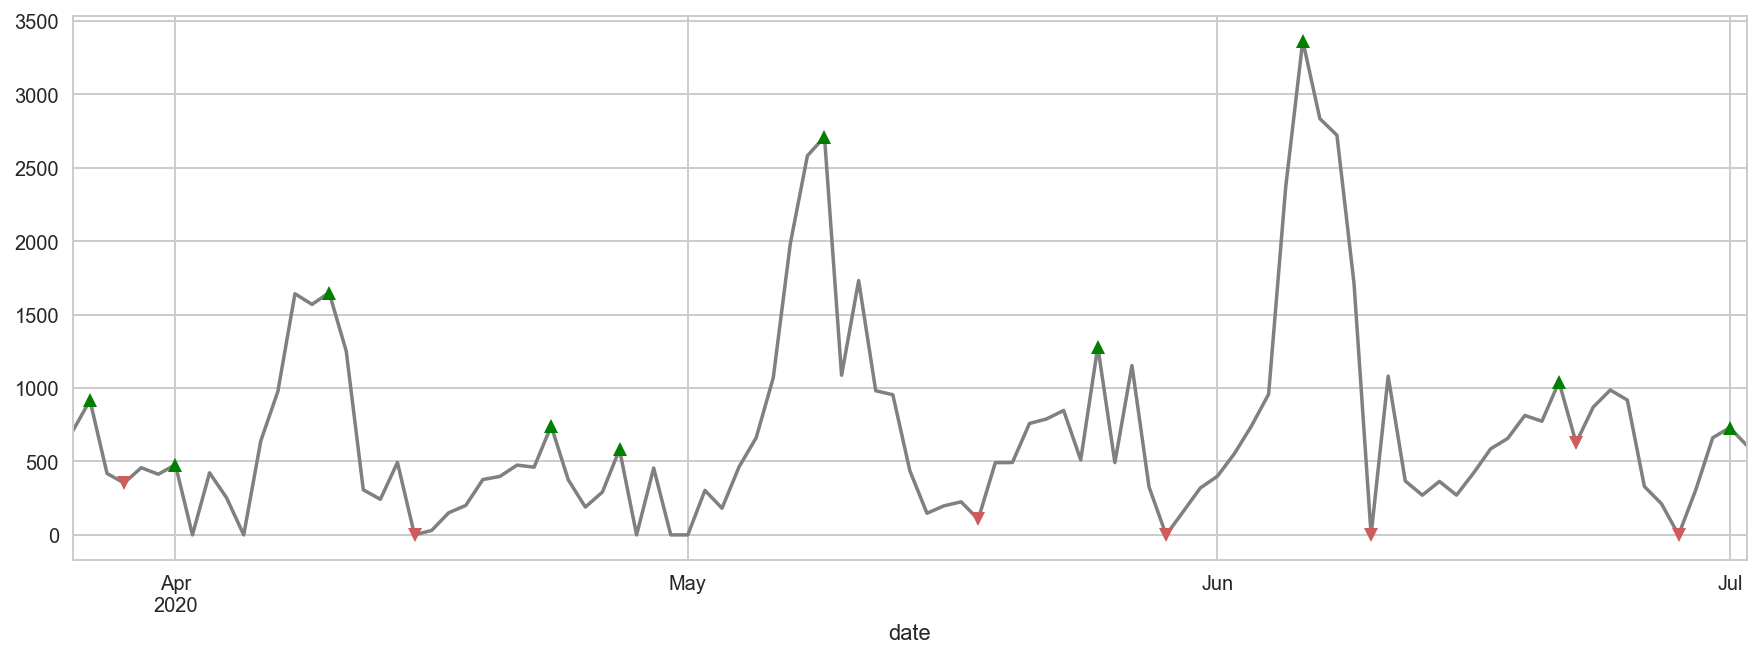

In [63]:
idxPeak = argrelmax(sQty.values, order=3)[0]
idxValley = argrelmin(sQty.values, order=3)[0]

fig, ax = plt.subplots(figsize=(15,5))
sQty.plot(color='grey')
sQty[idxValley].plot(style='v', lw=10, color='indianred')
sQty[idxPeak].plot(style='^', lw=10, color='green')
plt.show()

## 2.6. Change-points detection

In [70]:
import ruptures as rpt

In [75]:
dfQty = pd.read_csv('data/purchase_quantity.csv')
dfQty['date'] = pd.to_datetime(dfQty['date'], format='%d/%m/%Y')
dfQty = dfQty.set_index('date').asfreq('d').fillna(0)
sQty = dfQty.quantity

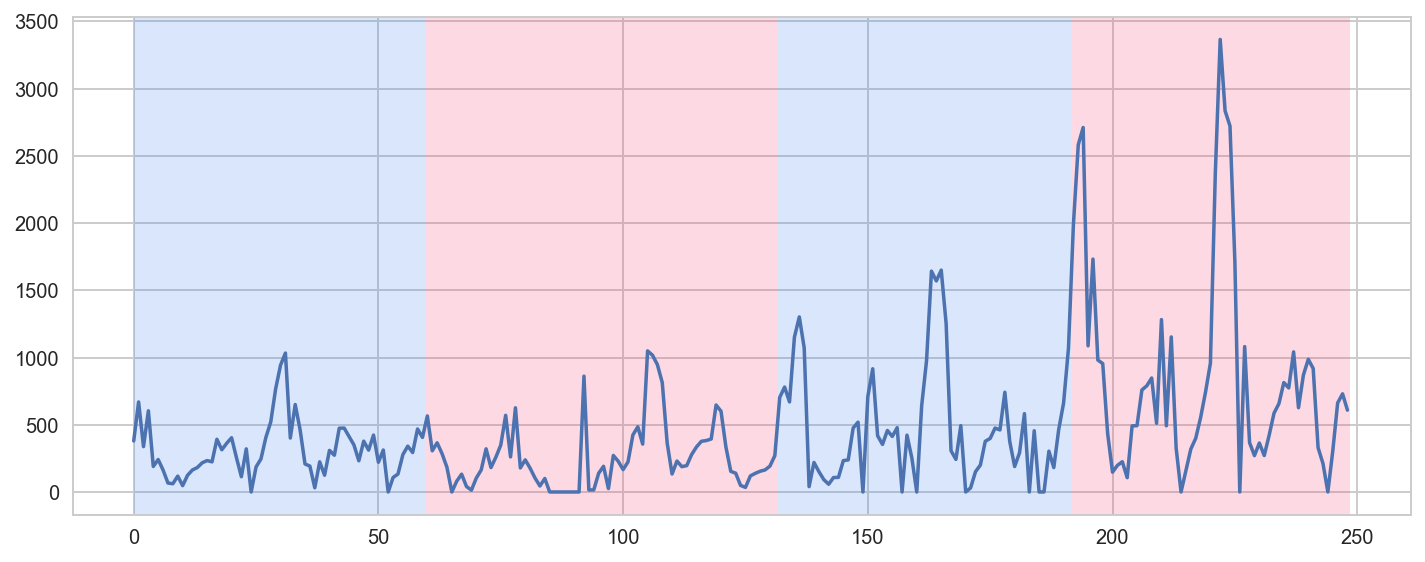

In [94]:
# algo = rpt.Pelt(model='l1', min_size=20, jump=12)
algo = rpt.Dynp(model='l1', min_size=20, jump=12)
model = algo.fit(sQty.values)
changepoints = model.predict(3)

fig, ax = rpt.display(sQty, changepoints, figsize=(10,4))

In [82]:
changepoints

[80, 100, 190, 249]

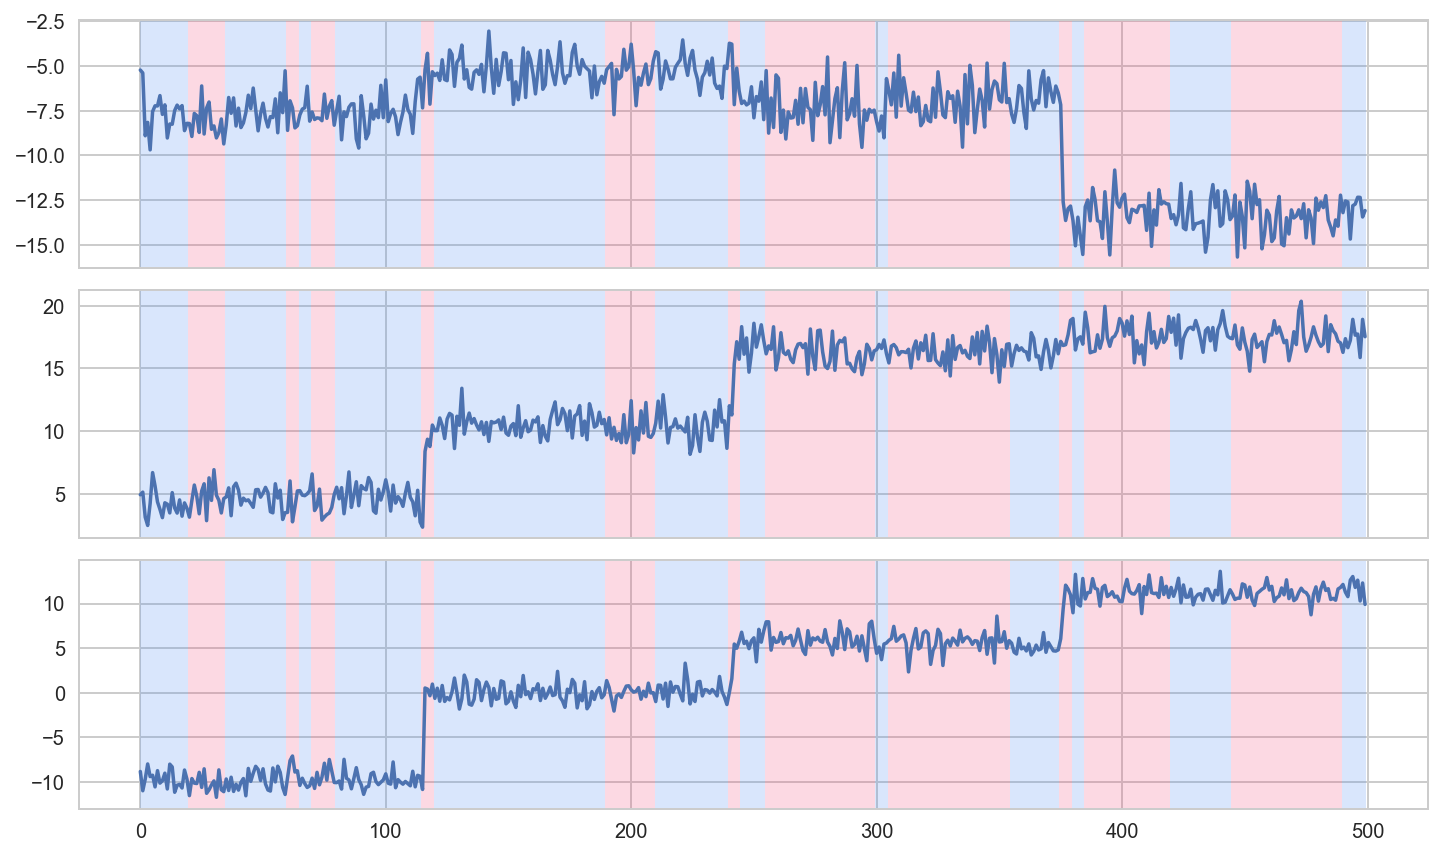

In [73]:
import ruptures as rpt

# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 1
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(pen=3)

# show results
fig, ax_arr = rpt.display(signal, my_bkps, figsize=(10, 6))
plt.show()

In [69]:
rpt.display?

Signature:
rpt.display(
    signal,
    true_chg_pts,
    computed_chg_pts=None,
    computed_chg_pts_color='k',
    computed_chg_pts_linewidth=3,
    computed_chg_pts_linestyle='--',
    computed_chg_pts_alpha=1.0,
    **kwargs,
)
Docstring:
Display a signal and the change points provided in alternating colors.
If another set of change point is provided, they are displayed with dashed
vertical dashed lines. The following matplotlib subplots options is set by
default, but can be changed when calling `display`):

- figure size `figsize`, defaults to `(10, 2 * n_features)`.

Args:
    signal (array): signal array, shape (n_samples,) or (n_samples, n_features).
    true_chg_pts (list): list of change point indexes.
    computed_chg_pts (list, optional): list of change point indexes.
    computed_chg_pts_color (str, optional): color of the lines indicating
        the computed_chg_pts. Defaults to "k".
    computed_chg_pts_linewidth (int, optional): linewidth of the lines
        indicatin

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*